In [1]:
!pip install -q requests huggingface_hub

In [ ]:
# Set the following API Keys in the Python environment. Will be used later.
HF_API_TOKEN = "Your_HF_API_Token"

In [3]:
from huggingface_hub import login

login(token=HF_API_TOKEN)

In [4]:
import requests


def query(payload, model_name):
    API_URL = f"https://api-inference.huggingface.co/models/{model_name}"
    headers = {"Authorization": f"Bearer {HF_API_TOKEN}"}

    response = requests.post(API_URL, headers=headers, json=payload)

    return response.json()

# API


## GPT-2 for Text Completion


In [9]:
data = query({"inputs": "Can you please let us know more details about"}, "gpt2")

In [10]:
data

[{'generated_text': 'Can you please let us know more details about this petition and how to contact us so we can bring them before the committee of the Fearing Youth Against Sheltering Conference at Scarborough at Election Day on June Aug. 9?"\n\nDespite the recent changes, Maslany said she\'s been planning to bring the legislation forward in order to help change cer:\n\nTo help wait out the comments storm about the forced evictions, and to assist to support cause and solid organisation of the place\n\nI want to stress here that this was largely'}]

In [11]:
print(data[0]["generated_text"])

Can you please let us know more details about this petition and how to contact us so we can bring them before the committee of the Fearing Youth Against Sheltering Conference at Scarborough at Election Day on June Aug. 9?"

Despite the recent changes, Maslany said she's been planning to bring the legislation forward in order to help change cer:

To help wait out the comments storm about the forced evictions, and to assist to support cause and solid organisation of the place

I want to stress here that this was largely


## Llama-3 8B


In [12]:
data = query(
    {"inputs": "Write a poem about blue sky."}, "meta-llama/Meta-Llama-3-8B-Instruct"
)

In [13]:
data[0]["generated_text"]

'Write a poem about blue sky. (50 words)\n\nThe blue sky above is so bright,\nA canvas of beauty, without a fight.\nIt stretches and arches, a work of art,\nA reflection of the heavens, within every heart.\nThe sun shines down, with a warm, gentle glow,\nBringing life and joy, to all below.\nThe blue sky, a symbol of hope and peace,\nA reminder to cherish, the beauty we release....more Unless words are changed as per wish, as per allowed 50'

## Summarization


In [8]:
text_to_summarize = """Wall Street was quiet Friday ahead of the monthly jobs report.
S&P and Nasdaq futures were little changed and Dow futures were a couple of points lower.
It’s been a shortened week for traders, with markets closing early Wednesday and closed all day Thursday in observance of the July 4th holiday.
Investors are looking for another Goldilocks jobs report Friday that shows a gentle cooling-off of the labor market.
Wednesday’s ADP data, which showed that private payrolls fell to 150,000, created little reaction among traders
— but the government’s monthly tally will likely trigger more of a response."""

data = query({"inputs": text_to_summarize}, "facebook/bart-large-cnn")

In [9]:
data[0]["summary_text"]

'S&P and Nasdaq futures were little changed and Dow futures were a couple of points lower. It’s been a shortened week for traders, with markets closing early Wednesday and closed all day Thursday in observance of the July 4th holiday. Wednesday’S ADP data, which showed that private payrolls fell to 150,000, created little reaction among traders.'

## Sentiment Analysis


In [10]:
text_to_analyse = """I love how this app simplifies complex tasks \
effortlessly . I'm frustrated by the frequent errors in the software's \
latest update"""

data = query(
    {"inputs": text_to_summarize}, "distilbert-base-uncased-finetuned-sst-2-english"
)

In [11]:
print(data[0])

[{'label': 'NEGATIVE', 'score': 0.9982388019561768}, {'label': 'POSITIVE', 'score': 0.0017612434457987547}]


## Example of Loading Model


In [12]:
data

[[{'label': 'NEGATIVE', 'score': 0.9982388019561768},
  {'label': 'POSITIVE', 'score': 0.0017612434457987547}]]

# Local


## Text-to-image


In [1]:
!pip install -q -U diffusers transformers torch torchvision

In [3]:
import transformers
transformers.utils.move_cache()

0it [00:00, ?it/s]

In [21]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda")

prompt = """Photorealistic abandoned space station interior, shot on Sony A7SIII. Emergency lights casting red glow on metallic walls,
floating debris in zero gravity. Dust particles catching light, detailed control panels with authentic displays, worn metal
textures. Natural light from Earth visible through cracked viewport. Documentary photography style, high dynamic range."""

negative_prompt = "cartoon, anime, illustration, painted, artificial, oversaturated, low quality, blurry, noisy, text, watermark"

image = pipe(prompt = prompt,
             negative_prompt = negative_prompt,
             guidance_scale=7).images[0]

image.save("space_station.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

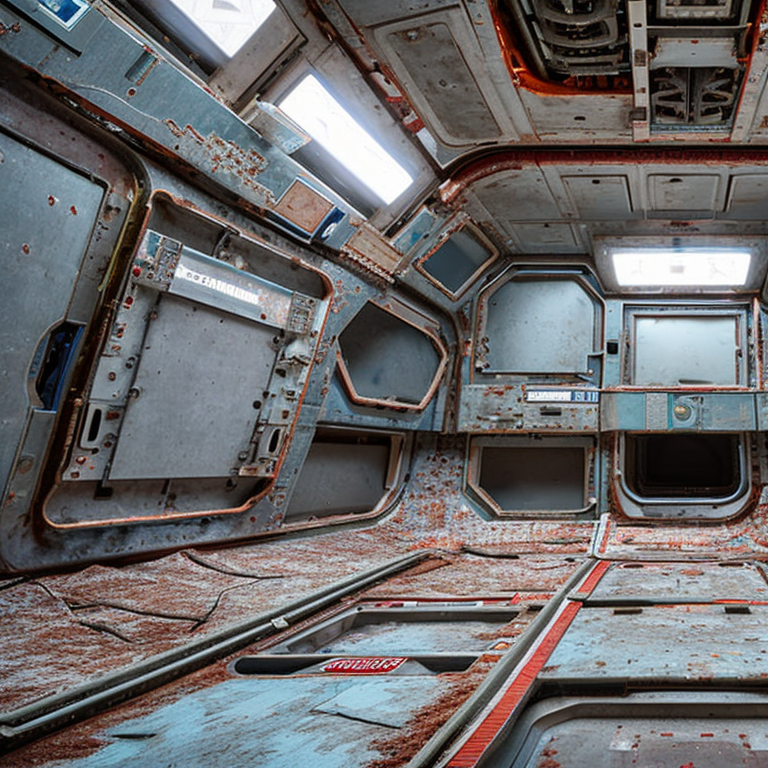

In [22]:
image

## Generate Text Embeddings


In [18]:
!pip install -q sentence-transformers

In [19]:
from sentence_transformers import SentenceTransformer

sentences = [
    """GAIA's questions are rooted in practical use cases, \
requiring AI systems to interact with a diverse and uncertain world, \
reflecting real-world applications.", " GAIA questions require accurate \
execution of complex sequences of actions, akin to the Proof of Work concept, \
where the solution is simple to verify but challenging to generate."""
]

model = SentenceTransformer("all-mpnet-base-v2", use_auth_token=HF_API_TOKEN)
embeddings = model.encode(sentences)
print(embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py:193: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v4 of SentenceTransformers.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 4.41169031e-02  3.27387452e-02 -3.73172984e-02  1.24095557e-02
  -6.53077215e-02  2.18004845e-02  7.53393676e-03 -6.98379055e-03
   3.14586423e-02  5.33480607e-02  1.06508546e-01 -1.67589020e-02
  -1.04805164e-03  9.16937217e-02  4.31791320e-03 -3.37307006e-02
   5.50885103e-04 -5.15411571e-02 -9.34587885e-03 -1.16703454e-02
  -7.63990916e-03 -1.16587272e-02 -5.57422452e-02  2.76471246e-02
  -4.77482826e-02 -4.29653786e-02 -4.81438451e-02  3.68168578e-03
   1.78769939e-02  1.93896852e-02 -2.63714623e-02 -3.10386699e-02
  -5.04346518e-03  2.18044668e-02  2.13915564e-06 -5.14952987e-02
   5.07950131e-03  3.51780169e-02 -8.26468468e-02 -7.90370815e-03
   9.32065584e-03  6.75809458e-02  2.29757093e-02  2.00852677e-02
  -5.39490730e-02  3.00226603e-02  5.20503111e-02  1.81182622e-05
   1.65842250e-02  2.44979989e-02 -1.41012436e-02 -2.70023346e-02
   4.51584421e-02 -1.66417453e-02  1.03413723e-02 -8.21502432e-02
   1.43633271e-03  1.50292413e-02  6.84080645e-02 -3.85220088e-02
   3.53457

## Image Captioning


In [20]:
from transformers import pipeline

image_to_text = pipeline(
    "image-to-text", model="nlpconnect/vit-gpt2-image-captioning", device="cuda"
)

caption = image_to_text("http://images.cocodataset.org/val2017/000000039769.jpg")

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


In [21]:
print(caption[0]["generated_text"])

a cat laying on a blanket next to a cat laying on a bed 


## Image Classification


In [22]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [23]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Egyptian cat
